<a href="https://colab.research.google.com/github/gregorywmorris/MLZoom2022/blob/main/week_three/Churn_Prediction_Project_week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
# Import Libraries
import pandas as pd # Import Pandas library
import numpy as np # Import NumPy library

import seaborn as sns # Import Seaborn
from matplotlib import pyplot as pyplot # Import Plotting tools
%matplotlib inline

# **Section 3.1: Churn Prediction Project**

The entire code of this project is available in this [Jupyter Notebook](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/chapter-03-churn-prediction/03-churn.ipynb).

Consider a phone company with some customers; let's call this company Telco. As is the case with customers, they may or may not remain loyal to Telco. Customers may very well be satisfied with the service they're receiving at Telco; however, as is the nature of customers, they are always in search of the best deals.

Suppose there is a competitor who emerges, let's call them Telco2 (for the sake of argument, avoid the copyright lawsuit). Some customers may consider leaving to Telco2. The objective for this project is to predict which customers would churn, or leave Telco to go receive services from Telco2 (the competitor).

We are going to identify these customers, and assign them a score between 0 and 1, likely based on probability. This score will be used to determine the likelihood the customer will leave.

The purpose of making these assessments is prevent customers from churning; this means businesses will act on data to find ways to retain the customers (i.e. special promotion, discount, etc.).

The way this will be approached is through **binary classification**.

Unlike the previous chapter, the y_i (the prediction) will be a probability that the customer will, leave; it will be a specific customer, i.

y_i exists in the domain [0, 1], where 1 is a positive conclusion (that is the customer did churn; 0 is that the customer did not churn.

This project is going to be reminiscent of the spam/not spam examples.

The information about the customers is X.

[Dataset from Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

[Raw Dataset Link](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv)

# **Section 3.2: Data Preparation**

[Section 3.2 Instructor Page](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/03-classification/02-data-preparation.md)

*   Download the data, read it with pandas
*   Look at the data
*   Make column names and values look uniform
*   Check if all the columns read correctly
*   Check if the churn variable needs any preparation








This session covered data obtention and some procedures of data preparation.

Commands, functions, and methods:

*   `!wget` - Linux shell command for downloading data
*   `pd.read.csv()` - read csv files
*   `df.head()` - take a look of the dataframe
*   `df.head().T` - take a look of the transposed dataframe
*   `df.columns` - retrieve column names of a dataframe
*   `df.columns.str.lower()` - lowercase all the letters
*   `df.columns.str.replace(' ', '_')` - replace the space separator
*   `df.dtypes` - retrieve data types of all series
*   `df.index` - retrive indices of a dataframe
*   `pd.to_numeric()` - convert a series values to numerical values. The `errors=coerce` argument allows making the transformation despite some encountered errors.
*   `df.fillna()` - replace NAs with some value
*   `(df.x == "yes").astype(int)` - convert x series of yes-no values to numerical values.



## Get the Data

In [2]:
# Input the data from the URL.
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [3]:
!wget $data -O data-week-3.csv 
# Save in  data week 3 file.
# The ! means we are executing a shell command.
# The linux command is specifically what executes the retrieval.
# The $ is how you refer to variables.

--2022-09-24 23:29:07--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘data-week-3.csv’

data-week-3.csv     100%[===================>] 954.59K  --.-KB/s    in 0.04s   

2022-09-24 23:29:07 (25.2 MB/s) - ‘data-week-3.csv’ saved [977501/977501]



## Read the Data Using Pandas

In [4]:
df = pd.read_csv('data-week-3.csv') # Load the data using the read_csv command; 
# store as a dataframe. Make sure to input the correct file name in the argument

In [5]:
df.shape # Display dataframe dimensions.

(7043, 21)

The dataframe has 7,043 rows and 21 columns.

In [6]:
df.head() # Display the first five rows of the dataframe.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Note that there are 21 columns. Note that between the OnlineSecurity (column 10) and the DeviceProtection columns, there is a set of ellipses that indicate the number of columns has been compressed.

Transpose the Dataframe to View All Columns

In [7]:
df.head().T # Transpose the dataframe

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


Customer number will be along the top beginning with Customer #0 up to Customer #7042.

In [8]:
len(df) # Display dataframe length

7043

## Normalize the Dataframe

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
# Format the columns string elements to be all lowercase and replace spaces
# with underscores; df.columns will replace the columns of the original
# dateframe
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Displays a list of the newly formatted columns
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

# Compose a for loop to replace the space each element, c of the dataframe with
# an underscore.
for c in categorical_columns:
  df[c] = df[c].str.lower().str.replace(' ', '_')

In [11]:
df.head().T # Display the transposed dataframe with formatted elements.

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


Next, look at the data types.

In [12]:
df.dtypes # Display the datatypes for each column in the dataframe.

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

Most of the datatypes are strings. A couple of the columns have integers and one has floating numbers.

The totalcharges column is listed as having 'object' datatypes when you would expect either a float64 or int64.

In [13]:
df.totalcharges # Display the totalcharges column.

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

When we attempt to convert the characters in the totalcharges column to strings, we get an error.

Commented out

In [14]:
# pd.to_numeric(df.totalcharges) # Attempt to change the datatypes from strings
# to numeric. The error indicates there are nonnumerical elements in this
# column.

In [15]:
tc = pd.to_numeric(df.totalcharges, errors = 'coerce') # Converts elements to 
# numeric datatypes; and the 'coerce' input forces the conversion despite not
# being eligible for conversion.

In [16]:
df[tc.isnull()][['customerid', 'totalcharges']] # Display the null values
# from customerid and totalcharges columns

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [17]:
df.totalcharges = pd.to_numeric(tc) # Replace
# the totalcharges column with tc.

In [18]:
df.totalcharges = df.totalcharges.fillna(0) # Fill the null values in the
# totalcharges column with 0.

Ideally, you do not want to replace null values with zero; but in a practice scenario, we can replace the null values with zero.

In [19]:
df.churn.head() # Display first five rows of churn column

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [20]:
(df.churn == 'yes').head() # Displays the boolean; yes is true, no is false

0    False
1    False
2     True
3    False
4     True
Name: churn, dtype: bool

We want to replace the boolean value with a number.

## Convert the Churn Column into a Binary Column

In [21]:
df.churn = (df.churn == 'yes').astype(int) # Replaces the boolean values 
# with an integer; and replaces the churn column with new integer values.
df.churn # Display the first five rows of the churn column

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

In [22]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [23]:
len(df.churn)

7043

# **Section 3.3: Setting Up the Validation Framework**

[Section 3.3 Instructor Page](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/03-classification/03-validation.md)

*   Perform the train/validation/test split with Scikit-Learn



Recall the dataframe distribution breakdown diagram: training data(60%), validation data (20%), and test data (20%).

This will be done with Scikit-Learn.

Scikit-Learn is a python library that has implementation in machine learning and data science. It has features that execute a train-test-split of data.

## Import Train-Test-Split from Scikit-Learn

In [24]:
from sklearn.model_selection import train_test_split

## `train_test_split?` 

The question mark displays a help window indicating the distribution size for each dataset. Commented out to avoid error.

## Split the Dataframe into `df_full_train` and `df_test`

Since the `train_test_split` command only splits the data into training and test, where the test size is 20%, we have the training data left at 80%, called `full_training`. We need to split the `full_training` dataset into training and validation.

In [25]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1)
# Splits the dataframe to have a test size of 20%, with random seed 1.
# This command splits the data into two parts: training and testing.

In [26]:
len(df_full_train), len(df_test) # Display the size of each dataset.

(5634, 1409)

## Split `df_full_train` into `df_train` and `df_val`

In [27]:
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1)
# Splits 25% of df_val from df_full_train with random seed 1.
# 20% of the 80% training data is 25%, hence why the validation data will be
# 25% of df_full_train.

In [28]:
len(df_train), len(df_val), len(df_test) # Display the size of each dataset.

(4225, 1409, 1409)

## Unshuffles the Index in Each Dataset

In [29]:
df_train.reset_index(drop = True) # Unshuffles the index for df_train
df_val.reset_index(drop = True) # Unshuffles the index for df_val
df_val.reset_index(drop = True) # Unshuffles the index for df_test

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5846-neqvz,male,0,yes,yes,71,yes,no,dsl,yes,...,yes,yes,no,yes,two_year,yes,credit_card_(automatic),70.85,4973.40,0
1,3645-deygf,male,0,no,yes,1,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,no,mailed_check,20.75,20.75,0
2,3590-tcxtb,male,0,no,no,1,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,no,mailed_check,20.35,20.35,0
3,8433-wxgna,male,0,no,no,2,yes,no,fiber_optic,yes,...,no,no,no,no,month-to-month,yes,electronic_check,75.70,189.20,1
4,2654-vbvpb,female,0,no,no,1,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,no,bank_transfer_(automatic),19.90,19.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,0980-pvmrc,female,0,yes,yes,40,no,no_phone_service,dsl,no,...,no,no,yes,yes,month-to-month,yes,electronic_check,50.85,2036.55,0
1405,2325-zusfd,female,0,yes,yes,57,yes,no,dsl,yes,...,no,no,yes,yes,one_year,yes,bank_transfer_(automatic),70.10,3913.30,1
1406,7382-dfjtu,male,0,no,no,18,yes,no,dsl,no,...,yes,yes,no,no,month-to-month,no,credit_card_(automatic),55.20,1058.10,0
1407,6521-yytyi,male,0,no,yes,1,yes,yes,fiber_optic,no,...,no,no,yes,yes,month-to-month,yes,electronic_check,93.30,93.30,1


Next we need to get our y variables.

In [30]:
y_train = df_train.churn.values # Gets the churn values from the training data;
# stored as y_train
y_val = df_val.churn.values # Gets the churn values from the validation data;
# stored as y_val
y_test = df_test.churn.values # Gets the churn values from the validation data;
# stored as y_test

## Delete Churn Column from Dataframes

In [31]:
del df_train['churn'] # Deletes the churn variable from the training data
del df_val['churn'] # Deletes the churn variable from the validation data
del df_test['churn'] # Deletes the churn variable from the test data

Note that the churn variable was not deleted from `df_full_train`. This will be addressed in Section 3.4.

# **Section 3.4: Exploratory Data Analysis (EDA)**

[Section 3.4 Instructor Page](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/03-classification/04-eda.md)

*   Check missing values
*   Look at the target variable (churn)
*   Look at numerical and categorical variables

Functions and methods:

*   `df.isnull().sum()` - returns the number of null values in the dataframe.
*   `df.x.value_counts()` returns the number of values for each category in x series. The `normalize=True` argument retrieves the percentage of each category. In this project, the mean of churn is equal to the churn rate obtained with the value_counts method.
*   `round(x, y)` - round an x number with y decimal places
*   `df[x].nunique()` - returns the number of unique values in x series



## Begin with the `full_train` dataset.

In [32]:
df_full_train = df_full_train.reset_index(drop = True) # Restore default indexes

In [33]:
df_full_train # Display training dataset

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


## Check for missing values.

In [34]:
df_full_train.isnull().sum() # Displays the number of null values in the
# training dataframe.

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

There are no missing values; so, we don't need to perform any additional data preparation.

In [35]:
df_full_train.churn.value_counts() # Displays the count for 0 and 1 in the churn
# column.

0    4113
1    1521
Name: churn, dtype: int64

We are seeing the distribution for how many users are churning and how many are being retained. In this case, out of the 5,634 customers in the dataset, Telcom is retaining approximately 73% of their customers, meaning that 27% of their customers are churning. In other words, the churn rate is 27%.

You can look at the percentage using the `normalize = True` input.

## Churn Rate

In [36]:
df_full_train.churn.value_counts(normalize = True) # Displays the percentage
# of each binary input's occurence in the churn column

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [37]:
global_churn_rate = df_full_train.churn.mean() # Another way to get the churn 
# rate is by computing the mean; stored as global_churn_rate.
global_churn_rate # Display global churn rate

0.26996805111821087

In [38]:
round(global_churn_rate, 2) # The global churn rate rounded to 2 decimal places

0.27

## Numerical & Categorical Variables

In [39]:
df_full_train.dtypes # Display the datatypes in df_full_train

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

The three variables in which we are interested are the columns: tenure, monthlycharges, and totalcharges. Not the seniorcitizen, because that is their age.

### Numerical Variables

In [40]:
numerical = ['tenure', 'monthlycharges', 'totalcharges'] # Extract the numerical
# variables from df_full_train; store as numerical

### Categorical Variables

To get categorical variables, we can look at all columns; and simply remove the numerical ones; in this case: tenure, monthlycharges, and totalcharges.

In [41]:
df_full_train.columns # Display df_full_train columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [42]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

# Establish the categorical variables.

Next, take a look at all the unique values for the categorical variables.

In [43]:
df_full_train[categorical].nunique() # Calculates the number of unique values
# in each column of the categorical variables that exist in df_full_train.

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# **Section 3.5: Feature Importance: Churn Rate and Risk Ratio**

[Section 3.5 Instructor Page](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/03-classification/05-risk.md)

Feature importance analysis (part of EDA) - identifying which features affect our target variable.

*   **Churn rate:** Difference between mean of the target variable and mean of categories for a feature. If this difference is greater than 0, it means that the category is less likely to churn, and if the difference is lower than 0, the group is more likely to churn. The larger differences are indicators that a variable is more important than others.
*   **Risk ratio:** Ratio between mean of categories for a feature and mean of the target variable. If this ratio is greater than 1, the category is more likely to churn, and if the ratio is lower than 1, the category is less likely to churn. It expresses the feature importance in relative terms.
*   Mutual information - later

**Functions and methods:**

*   `df.groupby('x').y.agg([mean()])` - returns a dataframe with mean of y series grouped by x series
*   `display(x)` displays an output in the cell of a jupyter notebook.


## Churn Rate

We can look at the churn rate for each group.

In [44]:
df_full_train.head() # Display the first five rows of df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


### Female Churn Rate

In [45]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
# Calculates the churn rate for females in df_full_train; stored as churn_female
churn_female # Display

0.27682403433476394

### Male Churn Rate

In [46]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
# Calculates the churn rate for females in df_full_train; stored as churn_male
churn_male # Display

0.2632135306553911

### Compare Female and Male Churn Rate

In [47]:
print(f'The global churn rate for is: {round(global_churn_rate, 5) * 100}%.')
print(f'The churn rate for women is: {round(churn_female, 5) * 100}%.')
print(f'The churn rate for men is: {round(churn_male, 5) * 100}%.')

print(f'The difference between the global churn rate and the churn rate for women is: {round(global_churn_rate - churn_female, 5) * 100}%.')
print(f'The difference between the global churn rate and the churn rate for men is: {round(global_churn_rate - churn_male, 5) * 100}%.')

The global churn rate for is: 26.997%.
The churn rate for women is: 27.682000000000002%.
The churn rate for men is: 26.321%.
The difference between the global churn rate and the churn rate for women is: -0.6859999999999999%.
The difference between the global churn rate and the churn rate for men is: 0.675%.


## Partner Churn Rate

In [48]:
df_full_train.partner.value_counts() #  Calculates the count for how many
# customers live with or without partners

no     2932
yes    2702
Name: partner, dtype: int64

In [49]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
# Calculates the churn rate for partnered customers in df_full_train; stored 
# as churn_partner
churn_partner # Display

0.20503330866025166

In [50]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
# Calculates the churn rate for nonpartnered customers in df_full_train; stored 
# as churn_no_partner
churn_male # Display

0.2632135306553911

### Compare Partners vs. No Partners Churn Rates

In [51]:
print(f'The global churn rate for is: {round(global_churn_rate, 5) * 100}%.')
print(f'The churn rate for partnered customers is: {round(churn_partner, 5) * 100}%.')
print(f'The churn rate for non partnered customers is: {round(churn_no_partner, 5) * 100}%.')
print(f'The difference between the global churn rate and the churn rate for partnered households is: {round(global_churn_rate - churn_partner, 5) * 100}%.')
print(f'The difference between the global churn rate and the churn rate for non partnered households is: {round(global_churn_rate - churn_no_partner, 5) * 100}%.')

The global churn rate for is: 26.997%.
The churn rate for partnered customers is: 20.503%.
The churn rate for non partnered customers is: 32.981%.
The difference between the global churn rate and the churn rate for partnered households is: 6.493%.
The difference between the global churn rate and the churn rate for non partnered households is: -5.984%.


There is a noticeable statistical significance between partnered households and non partnered households. This means that with gender, the churn rate does not really matter. 

## Feature Importance Introduced

This leads to talking about feature importance.

Difference of Global - Group; if the result is less than 0, then the group is less likely to churn; if the result is more than 0, then the group is more likely to churn.

In [52]:
print(f'The global churn rate for is: {round(global_churn_rate, 5) * 100}%.')
print(f'The churn rate for women is: {round(churn_female, 5) * 100}%.')
print(f'The churn rate for men is: {round(churn_male, 5) * 100}%.')

print(f'The difference between the global churn rate and the churn rate for women is: {round(global_churn_rate - churn_female, 5) * 100}%.')
print(f'The difference between the global churn rate and the churn rate for men is: {round(global_churn_rate - churn_male, 5) * 100}%.')



The global churn rate for is: 26.997%.
The churn rate for women is: 27.682000000000002%.
The churn rate for men is: 26.321%.
The difference between the global churn rate and the churn rate for women is: -0.6859999999999999%.
The difference between the global churn rate and the churn rate for men is: 0.675%.


In [53]:
print(f'The global churn rate for is: {round(global_churn_rate, 5) * 100}%.')
print(f'The churn rate for partnered customers is: {round(churn_partner, 5) * 100}%.')
print(f'The churn rate for non partnered customers is: {round(churn_no_partner, 5) * 100}%.')
print(f'The difference between the global churn rate and the churn rate for partnered households is: {round(global_churn_rate - churn_partner, 5) * 100}%.')
print(f'The difference between the global churn rate and the churn rate for non partnered households is: {round(global_churn_rate - churn_no_partner, 5) * 100}%.')

The global churn rate for is: 26.997%.
The churn rate for partnered customers is: 20.503%.
The churn rate for non partnered customers is: 32.981%.
The difference between the global churn rate and the churn rate for partnered households is: 6.493%.
The difference between the global churn rate and the churn rate for non partnered households is: -5.984%.


## Risk Ratio

As opposed to taking the difference to see which group is more likely, it is prudent to get percentages to find out which groups are more likely to churn.

Since the men and women saw negligible difference in their churn rate, focus on the partnered and non partnered groups.

The risk ratio is calculated by taking the Group Churn Rate and dividing it by the Global Churn Rate.

`group_churn / global_churn_rate`

If the ratio is greater than one, then the group is more likely to churn; if the ratio is less likely than one, then the group is less likely to churn.

In [54]:
churn_no_partner / global_churn_rate

1.2216593879412643

This is to say that customers without partners are 22% more likely to churn.

In [55]:
churn_partner / global_churn_rate

0.7594724924338315

This is to say that customers with a partner are 24% less likely to churn.

## Converting a SQL Query to Pandas

Consider this SQL query,

```
SELECT
  gender,
  AVG(churn),
  AVG(churn) - global_churn AS diff,
  AVG(churn) / global_churn AS risk
FROM
  data
GROUP BY
  gender;
```
we are going to take this query, and convert it to Pandas.



In [56]:
df_full_train.groupby('gender').churn.mean() # Displays the mean (read as: churn
# rate by gender

gender
female    0.276824
male      0.263214
Name: churn, dtype: float64

The churn rate by gender does not actually include the other data points required. The code needs to be more inclusive to get the difference and the risk factor using the `agg` method.

In [57]:
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count']) # Displays the
# mean (read as: churn rate) but includes the count; stored as df_group.
df_group # Display

,mean,count
gender,,
female,0.276824,2796
male,0.263214,2838


In [58]:
df_group['diff'] = df_group['mean'] - global_churn_rate # Generates a new column
# in the above table to include the difference
df_group['risk'] = df_group['mean'] / global_churn_rate # Generates a new column
# in the above table to include the risk ratio
df_group # Display

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


## Using a For Loop to Display Churn Info for all the Categorical Variables

We composed this table for gender and household partnerships; now we include all of the categories from the previous section using a for loop.

In [59]:
from IPython.display import display # This allows us to display the for loop
# results.

In [60]:
for c in categorical:
  print(c) # This will print the variable name above each respective table
  df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
  df_group['diff'] = df_group['mean'] - global_churn_rate # Generates a new column
  # in the above table to include the difference
  df_group['risk'] = df_group['mean'] / global_churn_rate # Generates a new column
  # in the above table to include the risk ratio
  display(df_group) # Display
  print() # Generates a line break.
  print() # Generates a line break.

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


# **Section 3.6: Features Importance: Mutual Information**

[Section 3.6 Instructor Page](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/03-classification/06-mutual-info.md)

Mutual information - concept from information theory, it tells us how much we can learn about one variable if we know the value of another.

https://en.wikipedia.org/wiki/Mutual_information

**Notes:**

Mutual information is a concept from information theory, which measures how much we can learn about one variable if we know the value of another. In this project, we can think of this as how much do we learn about churn if we have the information from a particular feature. So, it is a measure of the importance of a categorical variable.

Classes, functions, and methods:

*   `mutual_info_score(x, y)` - Scikit-Learn class for calculating the mutual information between the x target variable and y feature.
*   `df[x].apply(y)` - apply a y function to the x series of the df dataframe.
*   `df.sort_values(ascending=False).to_frame(name='x')` - sort values in an ascending order and called the column as x.



## Import and Implement Mutual Information Score from Scikit-Learn

In [61]:
from sklearn.metrics import mutual_info_score # Imports mutual_info_score from
# the Scikit-Learn library

This outputs a value that conveys how much we can learn about the contract variable by observing the churn variable; and vice-versa.

In [62]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [63]:
mutual_info_score(df_full_train.contract, df_full_train.churn)

0.0983203874041556

The operation is commutative; it does not matter in which sequence you communicate the the two variables.

In [64]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

When comparing trying to understand how much we can learn about the churn by observing gender, we see that this rate is low.

In [65]:
mutual_info_score(df_full_train.churn, df_full_train.partner)

0.009967689095399745

Partner is more important than gender, but far less important than contract.

Now, we are going to use the `apply` command in order to assess the mutual information with the rest of the categorical variables.

We first need to wrap it inside of a function.

In [66]:
def mutual_info_churn_score(series):
  return mutual_info_score(series, df_full_train.churn)

We are also going to sort the data so that the most important information comes first.



In [67]:
mi = df_full_train[categorical].apply(mutual_info_churn_score) # Outputs the
# mutual information scores for all of the categorical variables in the
# df_full_train; stores as mi (short for mutual information)
mi.sort_values(ascending = False) # Displays in descending order

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

# **Section 3.7: Feature Importance: Correlation**

[Section 3.7 Instructor Page](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/03-classification/07-correlation.md)

How about numerical columns?

Correlation coefficient - https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

**Notes:**

Correlation coefficient measures the degree of dependency between two variables. This value is negative if one variable grows while the other decreases, and it is positive if both variables increase. Depending on its size, the dependency between both variables could be low, moderate, or strong. It allows measuring the importance of numerical variables.

Correlation coefficients exist on a range: [-1, +1]. The question as to their magnitude is contingent on which 

Two variables have a *low correlation* if their correlations coefficient exists in the range: +/- [0.0, 0.2]. This means that the two variables rarely impact each other.

Two variables have a *moderate correlation* if their correlation coefficient exists in the range: +/- (0.2,0.6]. This means that the two variables sometimes impact each other.

Two variables have a *strong correlation* if their correlation coefficient exists in the range: +/- (0.6, 1.0]. This means that the two variables often impact each other. When the resulting correlation coefficent is greater than 0.9, then the two variables almost always impact each other.

The target variable, y, is going to exist in the range {0,1}, and X can be any real number.

**Functions and methods:**

*   `df[x].corrwith(y)` - returns the correlation between x and y series.

In [68]:
df_full_train.tenure.max()

72

So, the max value for the tenure column is 72; so the variable X exists within the domain [0, 72].

This means the y-value can only take on terms in the range [0, 1].

A positive correlation means that the more X increase, the more tenure, correlates to a higher churn rate.

A negative correlation means that the more X increase, the less tenure, correlates to a lower churn rate.

Zero correlation means that the variable does not affect the churn rate at all.

In [69]:
df_full_train[numerical] # Generates the columns with numerical datatypes from
# df_full_train

,tenure,monthlycharges,totalcharges
0,12,19.70,258.35
1,42,73.90,3160.55
2,71,65.15,4681.75
3,71,85.45,6300.85
4,30,70.40,2044.75
...,...,...,...
5629,9,100.50,918.60
5630,60,19.95,1189.90
5631,28,105.70,2979.50
5632,2,54.40,114.10


We want calculate the corrlation of these numerical columns with the churn column.

In [70]:
df_full_train[numerical].corrwith(df_full_train.churn) # Generates the
# correlation coefficient between the numerical variables in the dataset, with
# the churn variables in the dataset.

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

Displayed are the correlation coefficients for each of the numerical variables.

For `tenure`, it is being observed that there is a moderately negative correlation between `tenure` and `churn`. The longer a customer stays with the company, the less likely they are to churn.

For `monthlycharges`, it is being observed that there is a low positive correlation between `monthlycharges` and `churn`. The more people pay for monthly charges, the more likely they are to churn.

For `totalcharges`, it is being observed that there is a low negative correlation between `monthlycharges` and `churn`. The more people pay in total, the less likely they are to churn, which sounds counterintuitive.

The latter two numerical variables actually appear to have complete opposite corrlations with `churn`.

## Correlation Coefficient between Tenure and Churn

In [71]:
df_full_train[df_full_train.tenure <= 2].churn.mean() # Assessing the churn rate
# for customers who spent 2 months or less with the company.

0.5953420669577875

In [72]:
df_full_train[df_full_train.tenure > 2].churn.mean() # Assessing the churn rate
# for customers who spent more than 2 months with the company.

0.22478269658378816

In [73]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean() 
# Assessing the churn rate for customers who spent more than 2 months and less
# than or equal to 12 months with the company.

0.3994413407821229

In [74]:
df_full_train[df_full_train.tenure > 12].churn.mean() # Assessing the churn rate
# for customers who spent more than 12 months with the company.

0.17634908339788277

For `tenure`, there exists a negative correlation with `churn`.

## Correlation Coefficient between Monthly Charges and Churn

In [75]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean() # Assessing the 
# churn rate for customers who spent $20 or less per month.

0.08795411089866156

In [76]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean() 
# Assessing the churn rate for customers who spent more than $20 and $ 50 or 
# less per month.

0.18340943683409436

In [77]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean() # Assessing the 
# churn rate for customers who spent more than $50 per month.

0.32499341585462205

For `monthlycharges`, there exists a positve correlation with `churn`.

# **Section 3.8: One-Hot Encoding**

[Section 3.8 Instructor Page](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/03-classification/08-ohe.md)

*   Use Scikit-Learn to encode categorical features



**Notes:**

One-Hot Encoding allows encoding categorical variables in numerical ones. This method represents each category of a variable as one column, and a 1 is assigned if the value belongs to the category or 0 otherwise.

**Classes, functions, and methods:**

*   `df[x].to_dict(oriented='records')` - convert x series to dictionaries, oriented by rows.
*   `DictVectorizer().fit_transform(x)` - Scikit-Learn class for converting x dictionaries into a sparse matrix, and in this way doing the one-hot encoding. It does not affect the numerical variables.
*   `DictVectorizer().get_feature_names()` - returns the names of the columns in the sparse matrix.


## Import DictVectorizer from Scikit-Learn

In [78]:
from sklearn.feature_extraction import DictVectorizer

In [79]:
df_train[['gender', 'contract']].iloc[:10] # Display the first 10 rows of the
# gender and contract categorical variables from the training dataframe

,gender,contract
3897,female,two_year
1980,male,month-to-month
6302,female,month-to-month
727,female,month-to-month
5104,female,two_year
5387,male,month-to-month
459,male,month-to-month
5023,female,month-to-month
6778,female,two_year
1176,female,month-to-month


Initially, the instructor used `iloc[:10]`, but we ended up generating a 4-column matrix down below, when we required a 5-column matrix. The first 10 rows had no instances of a 1-year contract, so it was changed to 100.

In [80]:
dicts = df_train[['gender', 'contract']].iloc[:100].to_dict(orient = 'records') 
# Turns these data elements from the first 100 rows into a dictionary; 
# stored as dicts

In [81]:
dv = DictVectorizer(sparse = False)

In [82]:
dv.fit(dicts)

DictVectorizer(sparse=False)

In [83]:
dv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'gender=female',
 'gender=male']

These feature names correspond to the matrix below; the month-to-month contract correspeonds to the first column, the male customers respond to the far right column.

The first three columns are for contracts, and the last two columns are for gender.

In [84]:
dv.transform(dicts)

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0.

Suppose we have a dataframe with two categorical variables and one numerical variable.

In [85]:
dicts = df_train[['gender', 'contract', 'tenure']].iloc[:100].to_dict(orient = 'records') 
# Turns these data elements into a dictionary; stored as dicts. This version of
# dicts has tenure added.

In [86]:
dicts[0]

{'gender': 'female', 'contract': 'two_year', 'tenure': 72}

In [87]:
dv = DictVectorizer(sparse = False)

In [88]:
dv.fit(dicts)

DictVectorizer(sparse=False)

In [89]:
dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'gender=female',
 'gender=male',
 'tenure']

In [90]:
dv.transform(dicts)

array([[ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 10.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       [ 0.,  0.,  1.,  1.,  0., 18.],
       [ 1.,  0.,  0.,  0.,  1.,  4.],
       [ 1.,  0.,  0.,  0.,  1.,  1.],
       [ 1.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  1.,  0.,  6.],
       [ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 17.],
       [ 0.,  0.,  1.,  1.,  0., 66.],
       [ 1.,  0.,  0.,  1.,  0.,  2.],
       [ 1.,  0.,  0.,  1.,  0.,  4.],
       [ 1.,  0.,  0.,  0.,  1.,  3.],
       [ 0.,  0.,  1.,  1.,  0., 71.],
       [ 1.,  0.,  0.,  1.,  0., 32.],
       [ 0.,  1.,  0.,  0.,  1., 53.],
       [ 0.,  0.,  1.,  0.,  1., 56.],
       [ 1.,  0.,  0.,  0.,  1., 61.],
       [ 0.,  1.,  0.,  1.,  0., 41.],
       [ 1.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  0.,  3.],
       [ 1.,  0.,  0.,  0.,  1.,  3.],
       [ 0.,  0.,  1.,  0

The numerical variable remains unchanged; as seen in the far right column. Tenure was added on as the far right column.

## DictVectorizer and the Training Dataframe

In [91]:
train_dicts = df_train[categorical + numerical].to_dict(orient = 'records')

In [92]:
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [93]:
dv = DictVectorizer(sparse = False)

In [94]:
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [95]:
dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [96]:
list(dv.transform(train_dicts[:5])[0]) # Shows the first row as a list

[0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 115.5,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 72.0,
 8425.15]

## DictVectorizer Final Walkthrough

### Training Dataset

In [97]:
train_dicts = df_train[categorical + numerical].to_dict(orient = 'records')

In [98]:
dv = DictVectorizer(sparse = False)

In [99]:
dv.fit(train_dicts)
X_train = dv.transform(train_dicts)

In [100]:
X_train.shape

(4225, 45)

In [101]:
X_train = dv.fit_transform(train_dicts) # Shorter way of writing line 218

In [102]:
X_train.shape

(4225, 45)

### Validation Dataset

In [103]:
val_dicts = df_val[categorical + numerical].to_dict(orient = 'records')

In [104]:
dv = DictVectorizer(sparse = False)

In [105]:
dv.fit(val_dicts)
X_val = dv.transform(val_dicts)

In [106]:
X_val = dv.transform(val_dicts)

In [107]:
X_val.shape

(1409, 45)

# **Section 3.9: Logistic Regression**

[Section 3.9 Instructor Page](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/03-classification/09-logistic-regression.md)

*   Binary classification
*   Linear vs logistic regression


In [108]:
dv = DictVectorizer(sparse = False)

train_dict = df_train[categorical + numerical].to_dict(orient = 'records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient = 'records')
X_val = dv.transform(val_dict)

Recall:

g(x_i) = y_i; where g is the model, x_i is the individual data point, y_i is the target for that individual data point.

The value, y_i can be either a regression or a classification; and classification can be either binary or multiclass. While there are other types of classifications, this will be enough for now.

The binary classification will be the focus because this is the problem being solved by logistic regression.

So, for binary classification, y_i exists in a set {0, 1}, where y_i can be either 0 or 1 (0 being negative and 1 being positive; where not churning is negative, and churning is positive. Another example can be the not spam versus spam example.

Now consider g(x_i); which outputs a number between 0 and 1, a number which is treated as a probability of x_i belonging to the positive class.

Recall, the formul for linear regression is:

g(x_i) = w_0 + (w^T)x_i; the output of which can be any number from negative infinity to positive infinity, that is all real numbers. The term w_0 is the biased term, w is the weights vector - in this case transposed, and is multiplied by the features matrix.

Logistic regression works in a similar spirit. It has a similar expression, there's the bias term and the weights. However, the distinction lies in that in outputs a number between 0 and 1. It is doing this by using a special function known as **sigmoid**.

So, it takes the expression, and runs it through the sigmoid, and it generates an output between 0 and 1.

## Sigmoid Example

In [109]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))
  
# Variable z is the sigmoid input, and iscomprised of the terms
# that you observed in the linear regression equation.
# The return is the program syntax for the formula of a sigmoid.

In [110]:
z = np.linspace(-7, 7, 51) # Generates an array of 51 values that exist between
# -5 and +5; stored as z
z # Display

array([-7.0000000e+00, -6.7200000e+00, -6.4400000e+00, -6.1600000e+00,
       -5.8800000e+00, -5.6000000e+00, -5.3200000e+00, -5.0400000e+00,
       -4.7600000e+00, -4.4800000e+00, -4.2000000e+00, -3.9200000e+00,
       -3.6400000e+00, -3.3600000e+00, -3.0800000e+00, -2.8000000e+00,
       -2.5200000e+00, -2.2400000e+00, -1.9600000e+00, -1.6800000e+00,
       -1.4000000e+00, -1.1200000e+00, -8.4000000e-01, -5.6000000e-01,
       -2.8000000e-01,  8.8817842e-16,  2.8000000e-01,  5.6000000e-01,
        8.4000000e-01,  1.1200000e+00,  1.4000000e+00,  1.6800000e+00,
        1.9600000e+00,  2.2400000e+00,  2.5200000e+00,  2.8000000e+00,
        3.0800000e+00,  3.3600000e+00,  3.6400000e+00,  3.9200000e+00,
        4.2000000e+00,  4.4800000e+00,  4.7600000e+00,  5.0400000e+00,
        5.3200000e+00,  5.6000000e+00,  5.8800000e+00,  6.1600000e+00,
        6.4400000e+00,  6.7200000e+00,  7.0000000e+00])

In [111]:
sigmoid(z) # Plug z into the sigmoid function

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

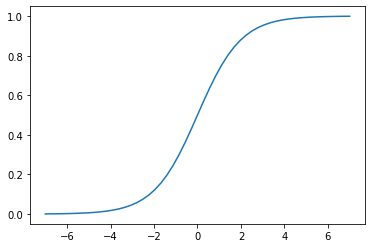

In [112]:
pyplot.plot(z, sigmoid(z)) # Plot the sigmoid with respect to z.

So, in effect, the input z is a score generated from the linear regression expression; and the sigmoid generates a probability based on the input z.

In [113]:
def linear_regression(x_i):
  result = w_0

  for j in range(len(w)):
    result = result + x_i[j] * w[j]

  return result

In [114]:
def logistic_regression(x_i):
  score = w_0

  for j in range(len(w)):
    score = score + x_i[j] * w[j]

  result = sigmoid(score)
  return result

# **Section 3.10: Training Logistic Regression with Scikit-Learn**

[Section 3.10 Instructor Page](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/03-classification/10-training-log-reg.md)

*   Train a model with Scikit-Learn
*   Apply it to the validation dataset
*   Calculate the accuracy



**Notes:**

This video was about training a logistic regression model with Scikit-Learn, applying it to the validation dataset, and calculating its accuracy.

**Classes, functions, and methods:**

*   `LogisticRegression().fit_transform(x)` - Scikit-Learn class for calculating the logistic regression model.
*   `LogisticRegression().coef_[0]` - returns
the coeffcients or weights of the LR model
*   `LogisticRegression().intercept_[0]` - returns the bias or intercept of the LR model
*   `LogisticRegression().predict[x]` - make predictions on the x dataset
*   `LogisticRegression().predict_proba[x]` - make predictions on the x dataset, and returns two columns with their probabilities for the two categories - soft predictions





## Import and Implement Logistic Regression Package

In [115]:
from sklearn.linear_model import LogisticRegression # Import the Logistic
# Regression package from Scikit-Learn

In [116]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [117]:
model.intercept_[0] # Displays the biased term; bias and intercept are synonymous.

-0.10903461122930498

In [118]:
model.coef_[0].round(3) # Displays the weights vector for the linear regression

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [119]:
model.predict(X_train) # These are called hard predictions; 1 is churn, 0 is
# not churn. This does not output the probability

array([0, 1, 1, ..., 1, 0, 1])

In [120]:
y_pred = model.predict_proba(X_train) # These are soft predictions; generates probability
# outputs; stored as y_pred.

There is a reason for 2 columns; the column on the left is the probability of there being a 0 on the binary output, and the column on the right is the probability of it being 1 on the binary output.

The probability for churning is what we are interested in assessing; in other words, the right column.

Extract the right column.

In [121]:
y_pred = model.predict_proba(X_val)[:, 1] # Predicts the probability for churn
# while extracting the right column - the column affirming the customer will
# churn; executed on the validation dataset; stored as y_pred

In [122]:
churn_decision = y_pred >= 0.5 # Generates a binary array based on which 
# customers are likely to churn

In [123]:
df_val[churn_decision].customerid # The company could consider sending
# promotional material to these customers based on the prediction

2504    8433-wxgna
4597    3440-jpscl
2343    2637-fkfsy
5591    7228-omtpn
4482    6711-fldfb
           ...    
2611    5976-jcjrh
4211    2034-cgrhz
3999    5276-kqwhg
6240    6521-yytyi
5282    3049-solay
Name: customerid, Length: 311, dtype: object

## Verifying Prediction Accuracy

In [124]:
y_val # Display

array([0, 0, 0, ..., 0, 1, 1])

In [125]:
churn_decision.astype(int) # Convert the datatype in churn_decision from binary
# to an integer.

array([0, 0, 0, ..., 0, 1, 1])

We can see some commonalities between y validation and the churn decision.

In [126]:
(y_val == churn_decision).mean() # Assess how many values match between both
# datasets and calculates how many of them actually match

0.8034066713981547

Approximately 80% of the validation dataset shares common elements with the churn decision.

Next, let's take a look at what is happening inside line 134.

In [127]:
df_pred = pd.DataFrame() # Create dataframe to see what is occuring inside;
# stored as df_pred
df_pred['probability'] = y_pred # This is the soft predictions; the probability
# the customer will churn
df_pred['prediction'] = churn_decision.astype(int) # The churn prediction; the
# data types converted to integers
df_pred['actual'] = y_val # The actual value

In [128]:
df_pred

,probability,prediction,actual
0,0.008996,0,0
1,0.204522,0,0
2,0.212222,0,0
3,0.543045,1,1
4,0.213785,0,0
...,...,...,...
1404,0.313661,0,0
1405,0.039356,0,1
1406,0.136384,0,0
1407,0.799770,1,1


Next, we need to see how many of them are correct.

In [129]:
df_pred['correct'] = df_pred.prediction == df_pred.actual # Operation to see
# how many of the predictions are correct.
df_pred # Display

,probability,prediction,actual,correct
0,0.008996,0,0,True
1,0.204522,0,0,True
2,0.212222,0,0,True
3,0.543045,1,1,True
4,0.213785,0,0,True
...,...,...,...,...
1404,0.313661,0,0,True
1405,0.039356,0,1,False
1406,0.136384,0,0,True
1407,0.799770,1,1,True


In [130]:
df_pred.correct.mean() # Display the percentage that is correct

0.8034066713981547

Line 134 is the shortcut to performing the entire operation we just completed. Our model is 80% correct.

# **Section 3.11: Model Interpretation**

[Section 3.11 Instructor Page](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/03-classification/11-log-reg-interpretation.md)

*   Look at the coefficients
*   Train a smaller model with fewer features

**Notes:**

This video was about the interpretation of coefficients, and training a model with fewer features.

In the formula of the logistic regression model, only one of the one-hot encoded categories is multiplied by 1, and the other by 0. In this way, we only consider the appropriate category for each categorical feature.

**Classes, functions, and methods:**

*   `zip(x,y) `- returns a new list with elements from x joined with their corresponding elements on y




In [131]:
dv.get_feature_names() # Gets the feature names

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [132]:
model.coef_[0].round(3) # Copied from line 121

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

Now, we are going to join the names of the features and join them with the coefficients, we will see what is the weight for each feature.

This is done with the zip function. What zip does

## Zip It Up

Just to show what the zip feature does on a simple example, consider the following.

In [133]:
a = [1, 2, 3, 4] # Small sample array
b = 'abcd' # Small sample string

In [134]:
list(zip(a, b)) # Generates a list where the first element of a is joined with
# the first element of b, and so forth.

[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]

In [135]:
dict(zip(a, b)) # Generates a dictionary where all the elements from a become
# keys, and all the elements from b become values.

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}

### Zipping the Features and Model Coefficients

In [136]:
dict(zip(dv.get_feature_names(), model.coef_[0].round(3))) # Generates a
# dictionary where the feature names are the keys, and the model coefficients
# are values in order to see the values for each of the variables.

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.07,
 

The list above is cumbersome to process, so we can actually just train a smaller model.

We can take a subset of features.

In [137]:
small = ['contract', 'tenure', 'monthlycharges'] # Smaller array with less
# features

In [138]:
df_train[small].iloc[:10].to_dict(orient = 'records') # This will be used for
# the vectorizer

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [139]:
dicts_train_small = df_train[small].to_dict(orient = 'records')
dicts_val_small = df_val[small].to_dict(orient = 'records')

In [140]:
dv_small = DictVectorizer(sparse = False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [141]:
dv_small.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

In [142]:
X_train_small = dv_small.transform(dicts_train_small)

In [143]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [144]:
w_0 = model_small.intercept_[0] # Bias term
w_0 # Display

-2.476775663985754

In [145]:
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [146]:
dict(zip(dv_small.get_feature_names(), w.round(3))) # These are the weights

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [147]:
sigmoid(-2.47) # Inserting the biased term into the sigmoid generates a result
# that says without knowing much about the customer, their probability of
# churning over is low.

0.07798823512936635

In [148]:
-2.47 + 0.97 + 50 * 0.027 + 5 * (-0.036)

# We want this to be our score - the input into our sigmoid.

# Add the 0.97, for their month-to-month
# contract is 0.97 * 1 (since 1 is true for monthly contract).
# When we learn that this customer has a monthly contract, we see a significant 
# increase. Just this increases to 0.18242552380635632.

# We also know the customer pays $50/month, and that for every $1 more they pay
# the probability increases when you multiply it by 0.027. This increases to
# 0.46257015465625034

# Adding the tenure; 5 months with the company - multiplied by the weight -
# decreases the sigmoid output to 0.41824062315816374

-0.3300000000000001

In [149]:
sigmoid(_) # The underscore acts as a stand-in for the previous cell's output
# and put it as the parameter.

0.41824062315816374

# **Section 3.12: Using the Model**





[Section 3.12 Instructor Page](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/03-classification/12-using-log-reg.md)

**Notes:**

We trained the logistic regression model with the full training dataset (training + validation), considering numerical and categorical features. Thus, predictions were made on the test dataset, and we evaluate the model using the accuracy metric.

In this case, the predictions of validation and test were similar, which means that the model is working well.

In [150]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient = 'records')

In [151]:
dicts_full_train[:3] # First 3 rows of the previous line

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35},
 {'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'credit_card_(automatic)',
  'tenur

In [152]:
dv = DictVectorizer(sparse = False)
X_full_train = dv.fit_transform(dicts_full_train)

In [153]:
y_full_train = df_full_train.churn.values

In [154]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

LogisticRegression()

In [155]:
dicts_test = df_test[categorical + numerical].to_dict(orient = 'records')

In [156]:
X_test = dv.transform(dicts_test)

In [157]:
y_pred = model.predict_proba(X_test)[:, 1]

In [158]:
churn_decision = (y_pred >= 0.5)

In [159]:
(churn_decision == y_test).mean() # Slightly more accurate

0.815471965933286

## Single Customer

In [160]:
customer = dicts_test[10] # Customer 10
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [161]:
X_small = dv.transform([customer])

In [162]:
X_small.shape

(1, 45)

In [163]:
model.predict_proba(X_small)

array([[0.5943189, 0.4056811]])

In [164]:
model.predict_proba(X_small)[0, 1]

0.4056810977859304

In [165]:
y_test[10]

0

# **Section 3.13: Summary**

[Section 3.13 Instructor Page](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/03-classification/13-summary.md)

*   Feature importance - risk, mutual information, correlation
*   One-hot encoding can be implemented with `DictVectorizer`
*   Logistic regression - linear model like linear regression
*   Output of log reg - probability
*   Interpretation of weights is similar to linear regression

In this session, we worked on a project to predict churning in customers from a company. We learned the feature importance of numerical and categorical variables, including risk ratio, mutual information, and correlation coefficient. Also, we understood one-hot encoding and implemented logistic regression with Scikit-Learn.

# **Section 3.14: Explore More**

[Section 3.14 Instructor Page](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/03-classification/14-explore-more.md)

More things

*   Try to exclude least useful features

Use scikit-learn in project of last week

*   Re-implement train/val/test split using scikit-learn in the project from the last week
*   Also, instead of our own linear regression, use `LinearRegression` (not regularized) and `RidgeRegression` (regularized). Find the best regularization parameter for Ridge

Other projects

*   Lead scoring - https://www.kaggle.com/ashydv/leads-dataset
*   Default prediction - https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients